# K Nearest Neighbor with python 

* data : /classified data


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import seaborn 

In [8]:
# reading csv file 
df = pd.read_csv('Classified Data', index_col = 0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [9]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [14]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [15]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [19]:
# now creating a new dataframe for scaled feature values 

df_feat = pd.DataFrame(scaled_features , columns = df.columns[:-1])


In [20]:
df_feat

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [22]:
from sklearn.model_selection import train_test_split

In [25]:
# heading to train_test_split

X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train ,y_test = train_test_split(X,y, random_state=101, test_size=0.3)

* Time to use KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn = KNeighborsClassifier(n_neighbors=1)


In [29]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
pred = knn.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print('classification report \n : ', classification_report(y_test, pred))
print('Confusion matrix :\n \n ', confusion_matrix(y_test, pred))

classification report 
 :                precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

Confusion matrix :
 
  [[151   8]
 [ 15 126]]


In [35]:
# Now choosing better value of 'k' or 'n_neighbors' to minimize the error rate

In [36]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

/tmp/ipykernel_8331/2770813773.py:2: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b--." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(range(1,40), error_rate, 'b--.', marker ='o', markerfacecolor = 'r', markersize = 10)


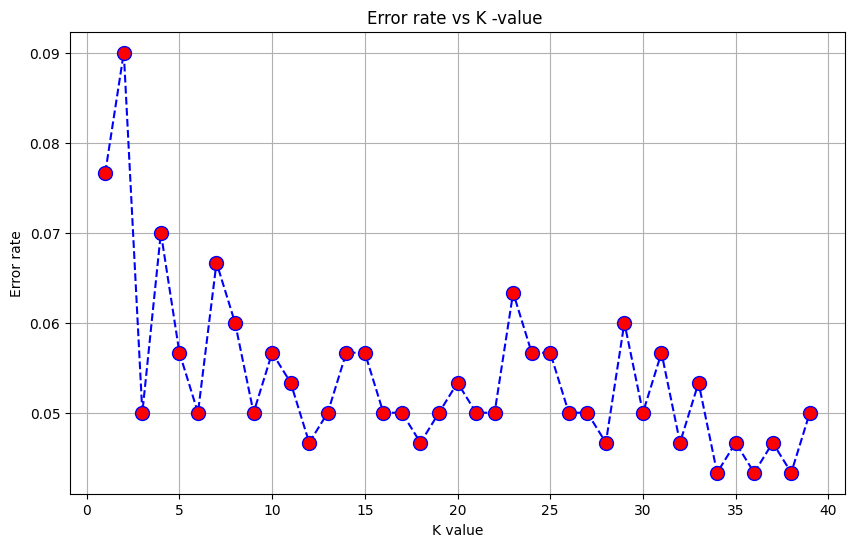

In [46]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, 'b--.', marker ='o', markerfacecolor = 'r', markersize = 10)
plt.grid(True)
plt.title("Error rate vs K -value ")
plt.xlabel('K value')
plt.ylabel("Error rate")
plt.show()


### From the above plot , we can see that the error rate is low at k-value 17 , 13,15....

* taking the k-value(n_neighbor =17) 

In [44]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train , y_train)
pred = knn.predict(X_test)
print("confusion metrics:")
print(confusion_matrix(y_test, pred))
print('\n \n')
print("Classification report :")
print(classification_report(y_test, pred))

confusion metrics:
[[153   6]
 [  9 132]]

 

Classification report :
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



##### Finally , the error rate is reduced and we got a good precision , recalll and f1-score values

### That's it about K Nearest Neighbor (k_NN)


* available at  https://github.com/sudeepbogati7?tab=repositories